In [1]:
# Importing Packages
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [2]:
# import main_df
main_df=pd.read_csv('Database/main_allyears_df.csv').iloc[:,3:]

                               OLS Regression Results                               
Dep. Variable:     Scoring Average (Actual)   R-squared:                       0.885
Model:                                  OLS   Adj. R-squared:                  0.884
Method:                       Least Squares   F-statistic:                     1410.
Date:                      Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                              12:51:04   Log-Likelihood:                -775.76
No. Observations:                       925   AIC:                             1564.
Df Residuals:                           919   BIC:                             1593.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

((array([-3.17504450e+00, -2.90809290e+00, -2.75900796e+00, -2.65380326e+00,
         -2.57169054e+00, -2.50394708e+00, -2.44605368e+00, -2.39535547e+00,
         -2.35015553e+00, -2.30930112e+00, -2.27197224e+00, -2.23756408e+00,
         -2.20561732e+00, -2.17577465e+00, -2.14775248e+00, -2.12132177e+00,
         -2.09629486e+00, -2.07251593e+00, -2.04985419e+00, -2.02819872e+00,
         -2.00745460e+00, -1.98753999e+00, -1.96838376e+00, -1.94992375e+00,
         -1.93210524e+00, -1.91487986e+00, -1.89820459e+00, -1.88204103e+00,
         -1.86635471e+00, -1.85111463e+00, -1.83629274e+00, -1.82186361e+00,
         -1.80780412e+00, -1.79409316e+00, -1.78071140e+00, -1.76764112e+00,
         -1.75486601e+00, -1.74237105e+00, -1.73014234e+00, -1.71816701e+00,
         -1.70643313e+00, -1.69492960e+00, -1.68364609e+00, -1.67257296e+00,
         -1.66170118e+00, -1.65102234e+00, -1.64052853e+00, -1.63021232e+00,
         -1.62006674e+00, -1.61008523e+00, -1.60026161e+00, -1.59059003e+00,

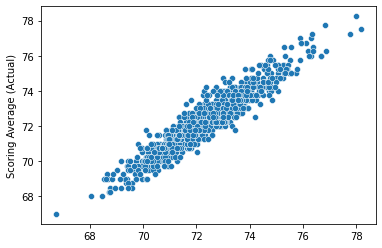

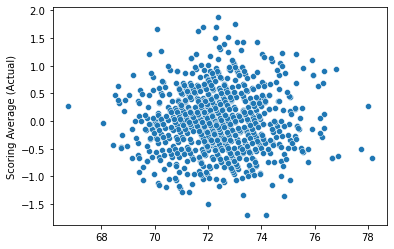

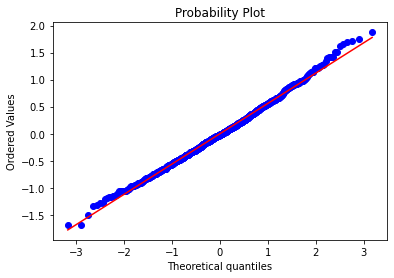

In [3]:
# More "creative" model using features that I think "should" be most important and useful



# combining training and validation also

# Define model parameters
y=main_df['Scoring Average (Actual)']
x=sm.add_constant(main_df[['Driving Distance','Greens in Regulation Percentage','Scrambling','3-Putts per Round','Putting Average']])

#### Choose between the two ####

# Split data into test, train, and validation
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=42)


# Cross Validation Set-up
# x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=42)
# lm = LinearRegression() 
# kf = KFold(n_splits=5,shuffle=True,random_state = 42)
# lm_cv = cross_val_score(lm, X_train, y_train,cv= kf,scoring='r2')
# print(lm_cv)
# print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

#### ^Choose between the two^ ####

# OLS Model
model=sm.OLS(y_train,x_train)
results=model.fit()
print(results.summary())
variables=results.model.exog
vif=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
print('VIF Numbers: '+str(vif))
adjR2=results.rsquared_adj
model=LinearRegression()
model.fit(x_train,y_train)
R2=model.score(x_train,y_train)
R2_test=model.score(x_test,y_test)
print('R^2: '+str(R2))
print('R^2 Test: '+str(R2_test))
print('Adj R^2: '+str(adjR2))
predictions=model.predict(x_train)
MSE=mean_squared_error(y_train,predictions)
MAE=mean_absolute_error(y_train,predictions)
coefficients=list(model.coef_)
intercept=model.intercept_
print('MSE: '+str(MSE))
print('MAE: '+str(MAE))
print('Intercept: '+str(intercept))
print('Coefficients: '+str(coefficients))
plt.figure()
print(sns.scatterplot(y=y_train,x=predictions))
residuals=y_train-predictions
plt.figure()
print(sns.scatterplot(y=residuals,x=predictions))
plt.figure()
stats.probplot(residuals, dist="norm",plot=plt)


In [4]:
# R^2 dropped slightly when combining training and validation
# MAE increased slightly when combining training and validation


# x=sm.add_constant(main_df[['Driving Distance','Driving Accuracy Percentage','Good Drive Percentage','Greens in Regulation Percentage','Scrambling','1-Putts per Round','3-Putts per Round','Putting Average']])


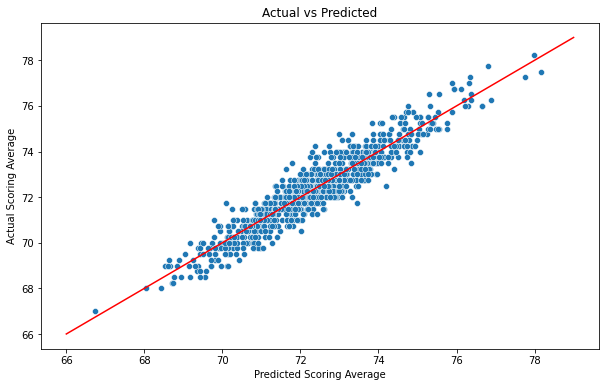

In [5]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(y=y_train,x=predictions).set(title='Actual vs Predicted')
plt.xlabel('Predicted Scoring Average')
plt.ylabel('Actual Scoring Average')
plt.plot([66,79],[66,79],'r')
plt.savefig('model3_actual_v_pred.png', dpi=300)

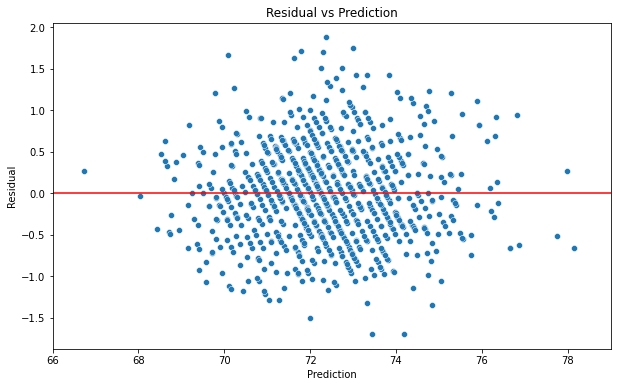

In [6]:
residuals=y_train-predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(y=residuals,x=predictions).set(title='Residual vs Prediction')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.plot([66,79],[0,0],'r')
plt.xlim(66, 79)
plt.savefig('model3_residual.png', dpi=300)

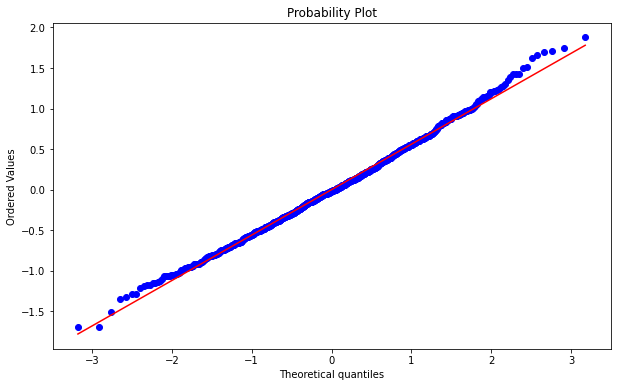

In [7]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm",plot=plt)
plt.savefig('model3_qq.png', dpi=300)

                               OLS Regression Results                               
Dep. Variable:     Scoring Average (Actual)   R-squared:                       0.893
Model:                                  OLS   Adj. R-squared:                  0.892
Method:                       Least Squares   F-statistic:                     634.2
Date:                      Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                              12:51:06   Log-Likelihood:                -559.44
No. Observations:                       693   AIC:                             1139.
Df Residuals:                           683   BIC:                             1184.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

((array([-3.09031775, -2.81662312, -2.66330922, -2.55489082, -2.47012474,
         -2.40008917, -2.34015842, -2.28761339, -2.24071519, -2.19828205,
         -2.15947291, -2.12366722, -2.09039353, -2.05928497, -2.03005026,
         -2.0024541 , -1.97630363, -1.9514387 , -1.9277248 , -1.90504787,
         -1.88331027, -1.86242778, -1.84232722, -1.82294459, -1.80422356,
         -1.78611431, -1.76857255, -1.75155871, -1.73503728, -1.71897631,
         -1.7033469 , -1.68812283, -1.67328026, -1.65879742, -1.64465439,
         -1.63083288, -1.61731607, -1.60408846, -1.59113571, -1.57844453,
         -1.56600261, -1.5537985 , -1.54182151, -1.5300617 , -1.51850976,
         -1.50715698, -1.49599519, -1.48501673, -1.4742144 , -1.4635814 ,
         -1.45311134, -1.4427982 , -1.43263628, -1.42262017, -1.41274479,
         -1.40300529, -1.39339709, -1.38391583, -1.37455737, -1.36531777,
         -1.35619328, -1.34718033, -1.3382755 , -1.32947554, -1.32077735,
         -1.31217796, -1.30367452, -1.

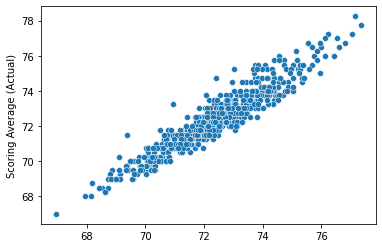

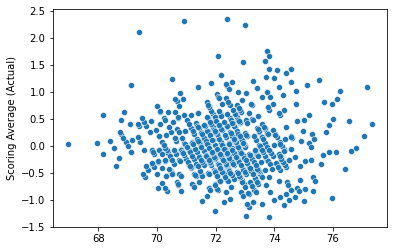

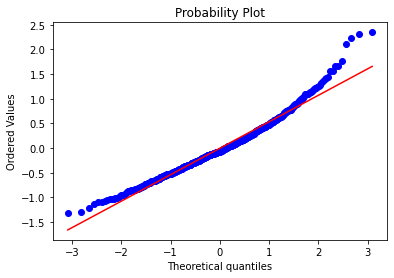

In [8]:
# Model 1

# Define model parameters
y=main_df['Scoring Average (Actual)']
x=sm.add_constant(main_df[['Stroke Differential Field Average','Par 3 Birdie or Better Leaders','Par 4 Birdie or Better Leaders','Par 5 Birdie or Better Leaders','Bogey Average','GIR Percentage from Fairway','GIR Percentage from Other than Fairway','Scrambling','Putting Average']])

#### Choose between the two ####

# Split data into test, train, and validation
x, x_test, y, y_test = train_test_split(x, y,test_size=.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 3)

# Cross Validation Set-up
# x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=42)
# lm = LinearRegression() 
# kf = KFold(n_splits=5,shuffle=True,random_state = 42)
# lm_cv = cross_val_score(lm, X_train, y_train,cv= kf,scoring='r2')
# print(lm_cv)
# print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

#### ^Choose between the two^ ####

# OLS Model
model=sm.OLS(y_train,x_train)
results=model.fit()
print(results.summary())
variables=results.model.exog
vif=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
print('VIF Numbers: '+str(vif))
adjR2=results.rsquared_adj
model=LinearRegression()
model.fit(x_train,y_train)
R2=model.score(x_train,y_train)
R2_val=model.score(x_val,y_val)
print('R^2: '+str(R2))
print('R^2 Val: '+str(R2_val))
print('Adj R^2: '+str(adjR2))
predictions=model.predict(x_train)
MSE=mean_squared_error(y_train,predictions)
MAE=mean_absolute_error(y_train,predictions)
coefficients=list(model.coef_)
intercept=model.intercept_
print('MSE: '+str(MSE))
print('MAE: '+str(MAE))
print('Intercept: '+str(intercept))
print('Coefficients: '+str(coefficients))
plt.figure()
print(sns.scatterplot(y=y_train,x=predictions))
residuals=y_train-predictions
plt.figure()
print(sns.scatterplot(y=residuals,x=predictions))
plt.figure()
stats.probplot(residuals, dist="norm",plot=plt)


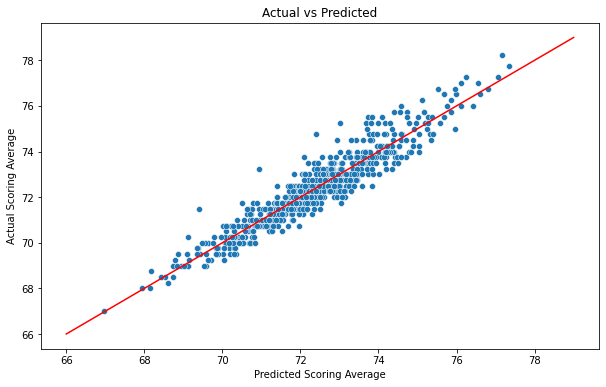

In [9]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(y=y_train,x=predictions).set(title='Actual vs Predicted')
plt.xlabel('Predicted Scoring Average')
plt.ylabel('Actual Scoring Average')
plt.plot([66,79],[66,79],'r')
plt.savefig('model1_actual_v_pred.png', dpi=300)

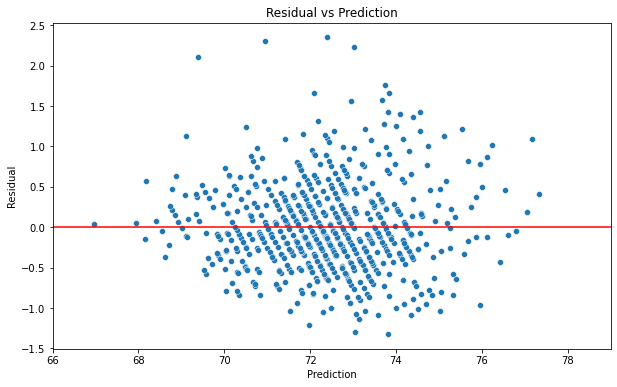

In [10]:
residuals=y_train-predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(y=residuals,x=predictions).set(title='Residual vs Prediction')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.plot([66,79],[0,0],'r')
plt.xlim(66, 79)
plt.savefig('model1_residual.png', dpi=300)

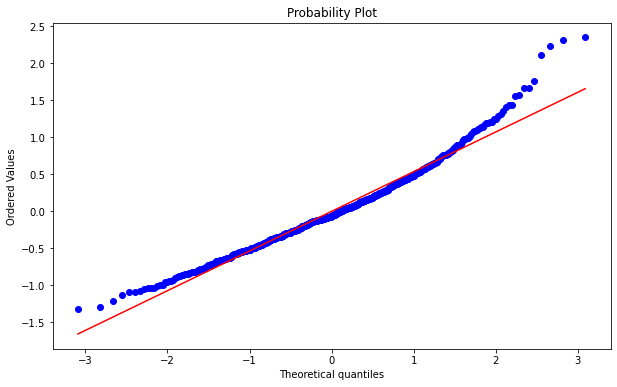

In [12]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm",plot=plt)
plt.savefig('model1_qq.png', dpi=300)

                               OLS Regression Results                               
Dep. Variable:     Scoring Average (Actual)   R-squared:                       0.839
Model:                                  OLS   Adj. R-squared:                  0.838
Method:                       Least Squares   F-statistic:                     511.2
Date:                      Tue, 09 Aug 2022   Prob (F-statistic):          4.66e-267
Time:                              13:49:13   Log-Likelihood:                -700.74
No. Observations:                       693   AIC:                             1417.
Df Residuals:                           685   BIC:                             1454.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

((array([-3.09031775, -2.81662312, -2.66330922, -2.55489082, -2.47012474,
         -2.40008917, -2.34015842, -2.28761339, -2.24071519, -2.19828205,
         -2.15947291, -2.12366722, -2.09039353, -2.05928497, -2.03005026,
         -2.0024541 , -1.97630363, -1.9514387 , -1.9277248 , -1.90504787,
         -1.88331027, -1.86242778, -1.84232722, -1.82294459, -1.80422356,
         -1.78611431, -1.76857255, -1.75155871, -1.73503728, -1.71897631,
         -1.7033469 , -1.68812283, -1.67328026, -1.65879742, -1.64465439,
         -1.63083288, -1.61731607, -1.60408846, -1.59113571, -1.57844453,
         -1.56600261, -1.5537985 , -1.54182151, -1.5300617 , -1.51850976,
         -1.50715698, -1.49599519, -1.48501673, -1.4742144 , -1.4635814 ,
         -1.45311134, -1.4427982 , -1.43263628, -1.42262017, -1.41274479,
         -1.40300529, -1.39339709, -1.38391583, -1.37455737, -1.36531777,
         -1.35619328, -1.34718033, -1.3382755 , -1.32947554, -1.32077735,
         -1.31217796, -1.30367452, -1.

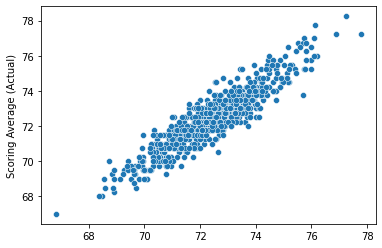

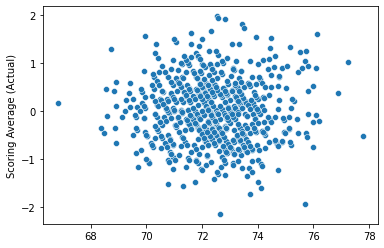

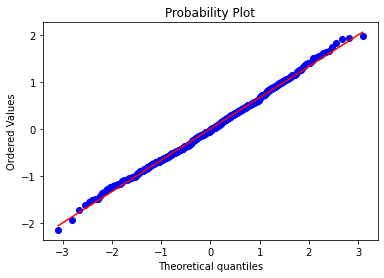

In [13]:
# Model 2


# Define model parameters
y=main_df['Scoring Average (Actual)']
x=sm.add_constant(main_df[['Driving Distance','Driving Accuracy Percentage','GIR Percentage from Fairway','GIR Percentage from Other than Fairway','Scrambling','One-Putt Percentage','Putting Average']])

#### Choose between the two ####

# Split data into test, train, and validation
x, x_test, y, y_test = train_test_split(x, y,test_size=.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 3)

# Cross Validation Set-up
# x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=42)
# lm = LinearRegression() 
# kf = KFold(n_splits=5,shuffle=True,random_state = 42)
# lm_cv = cross_val_score(lm, X_train, y_train,cv= kf,scoring='r2')
# print(lm_cv)
# print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

#### ^Choose between the two^ ####

# OLS Model
model=sm.OLS(y_train,x_train)
results=model.fit()
print(results.summary())
variables=results.model.exog
vif=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
print('VIF Numbers: '+str(vif))
adjR2=results.rsquared_adj
model=LinearRegression()
model.fit(x_train,y_train)
R2=model.score(x_train,y_train)
R2_val=model.score(x_val,y_val)
print('R^2: '+str(R2))
print('R^2 Val: '+str(R2_val))
print('Adj R^2: '+str(adjR2))
predictions=model.predict(x_train)
MSE=mean_squared_error(y_train,predictions)
MAE=mean_absolute_error(y_train,predictions)
coefficients=list(model.coef_)
intercept=model.intercept_
print('MSE: '+str(MSE))
print('MAE: '+str(MAE))
print('Intercept: '+str(intercept))
print('Coefficients: '+str(coefficients))
plt.figure()
print(sns.scatterplot(y=y_train,x=predictions))
residuals=y_train-predictions
plt.figure()
print(sns.scatterplot(y=residuals,x=predictions))
plt.figure()
stats.probplot(residuals, dist="norm",plot=plt)


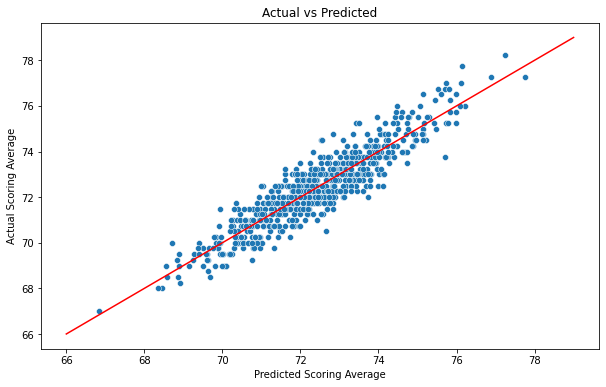

In [14]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(y=y_train,x=predictions).set(title='Actual vs Predicted')
plt.xlabel('Predicted Scoring Average')
plt.ylabel('Actual Scoring Average')
plt.plot([66,79],[66,79],'r')
plt.savefig('model2_actual_v_pred.png', dpi=300)

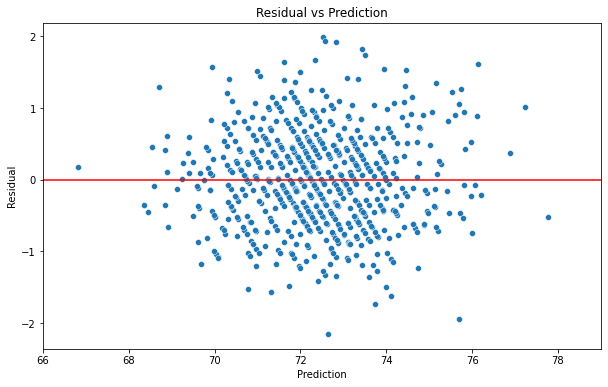

In [15]:
residuals=y_train-predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(y=residuals,x=predictions).set(title='Residual vs Prediction')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.plot([66,79],[0,0],'r')
plt.xlim(66, 79)
plt.savefig('model2_residual.png', dpi=300)

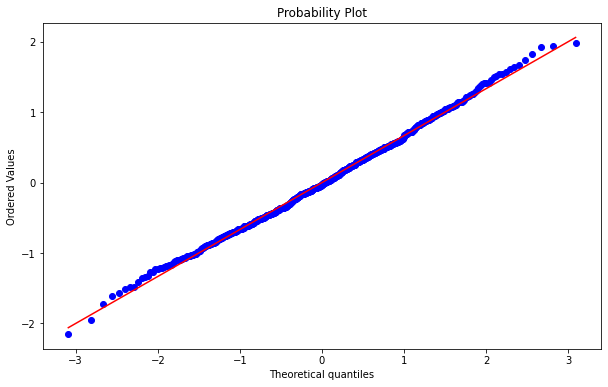

In [16]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm",plot=plt)
plt.savefig('model2_qq.png', dpi=300)

                               OLS Regression Results                               
Dep. Variable:     Scoring Average (Actual)   R-squared:                       0.880
Model:                                  OLS   Adj. R-squared:                  0.880
Method:                       Least Squares   F-statistic:                     1265.
Date:                      Tue, 09 Aug 2022   Prob (F-statistic):          2.18e-315
Time:                              14:20:30   Log-Likelihood:                -598.71
No. Observations:                       693   AIC:                             1207.
Df Residuals:                           688   BIC:                             1230.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

((array([-3.09031775, -2.81662312, -2.66330922, -2.55489082, -2.47012474,
         -2.40008917, -2.34015842, -2.28761339, -2.24071519, -2.19828205,
         -2.15947291, -2.12366722, -2.09039353, -2.05928497, -2.03005026,
         -2.0024541 , -1.97630363, -1.9514387 , -1.9277248 , -1.90504787,
         -1.88331027, -1.86242778, -1.84232722, -1.82294459, -1.80422356,
         -1.78611431, -1.76857255, -1.75155871, -1.73503728, -1.71897631,
         -1.7033469 , -1.68812283, -1.67328026, -1.65879742, -1.64465439,
         -1.63083288, -1.61731607, -1.60408846, -1.59113571, -1.57844453,
         -1.56600261, -1.5537985 , -1.54182151, -1.5300617 , -1.51850976,
         -1.50715698, -1.49599519, -1.48501673, -1.4742144 , -1.4635814 ,
         -1.45311134, -1.4427982 , -1.43263628, -1.42262017, -1.41274479,
         -1.40300529, -1.39339709, -1.38391583, -1.37455737, -1.36531777,
         -1.35619328, -1.34718033, -1.3382755 , -1.32947554, -1.32077735,
         -1.31217796, -1.30367452, -1.

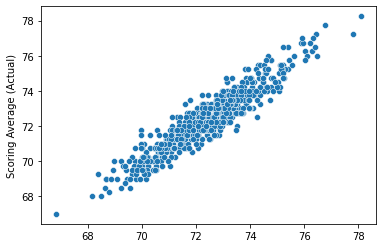

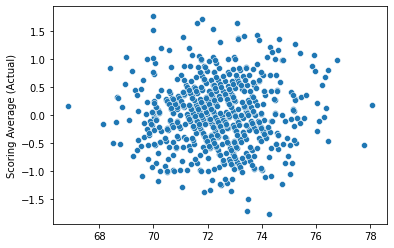

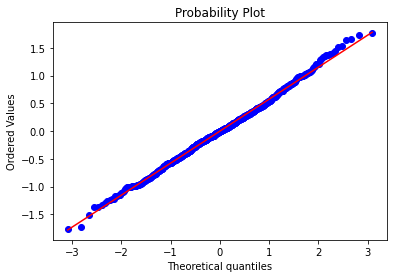

In [17]:
# model 4

# Define model parameters
y=main_df['Scoring Average (Actual)']
x=sm.add_constant(main_df[['Greens in Regulation Percentage','Scrambling','3-Putts per Round','Putting Average']])

#### Choose between the two ####

# Split data into test, train, and validation
x, x_test, y, y_test = train_test_split(x, y,test_size=.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 3)

# Cross Validation Set-up
# x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=42)
# lm = LinearRegression() 
# kf = KFold(n_splits=5,shuffle=True,random_state = 42)
# lm_cv = cross_val_score(lm, X_train, y_train,cv= kf,scoring='r2')
# print(lm_cv)
# print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

#### ^Choose between the two^ ####

# OLS Model
model=sm.OLS(y_train,x_train)
results=model.fit()
print(results.summary())
variables=results.model.exog
vif=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
print('VIF Numbers: '+str(vif))
adjR2=results.rsquared_adj
model=LinearRegression()
model.fit(x_train,y_train)
R2=model.score(x_train,y_train)
R2_val=model.score(x_val,y_val)
print('R^2: '+str(R2))
print('R^2 Val: '+str(R2_val))
print('Adj R^2: '+str(adjR2))
predictions=model.predict(x_train)
MSE=mean_squared_error(y_train,predictions)
MAE=mean_absolute_error(y_train,predictions)
coefficients=list(model.coef_)
intercept=model.intercept_
print('MSE: '+str(MSE))
print('MAE: '+str(MAE))
print('Intercept: '+str(intercept))
print('Coefficients: '+str(coefficients))
plt.figure()
print(sns.scatterplot(y=y_train,x=predictions))
residuals=y_train-predictions
plt.figure()
print(sns.scatterplot(y=residuals,x=predictions))
plt.figure()
stats.probplot(residuals, dist="norm",plot=plt)


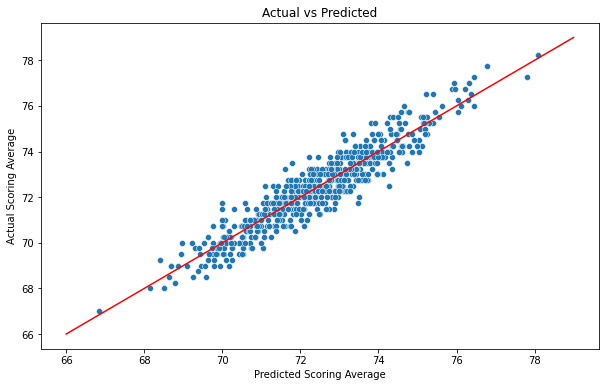

In [18]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(y=y_train,x=predictions).set(title='Actual vs Predicted')
plt.xlabel('Predicted Scoring Average')
plt.ylabel('Actual Scoring Average')
plt.plot([66,79],[66,79],'r')
plt.savefig('model4_actual_v_pred.png', dpi=300)

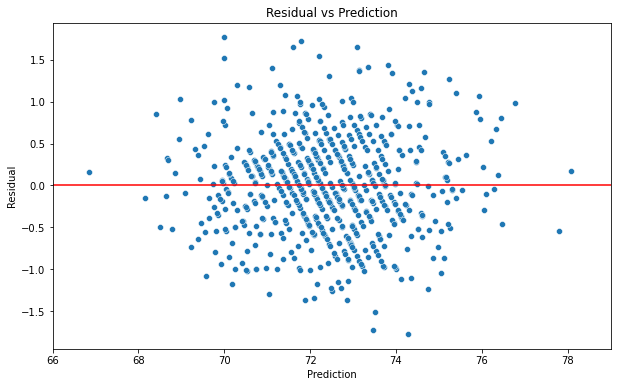

In [19]:
residuals=y_train-predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(y=residuals,x=predictions).set(title='Residual vs Prediction')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.plot([66,79],[0,0],'r')
plt.xlim(66, 79)
plt.savefig('model4_residual.png', dpi=300)

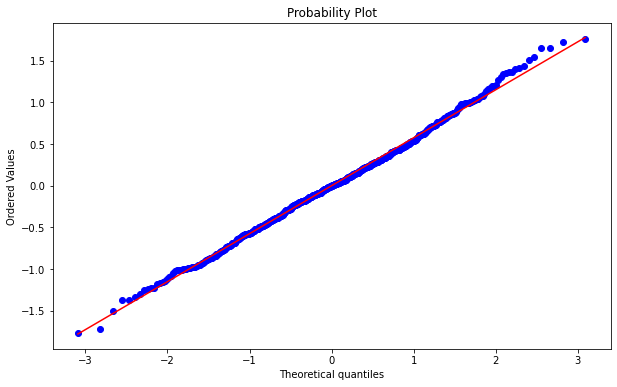

In [20]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm",plot=plt)
plt.savefig('model4_qq.png', dpi=300)

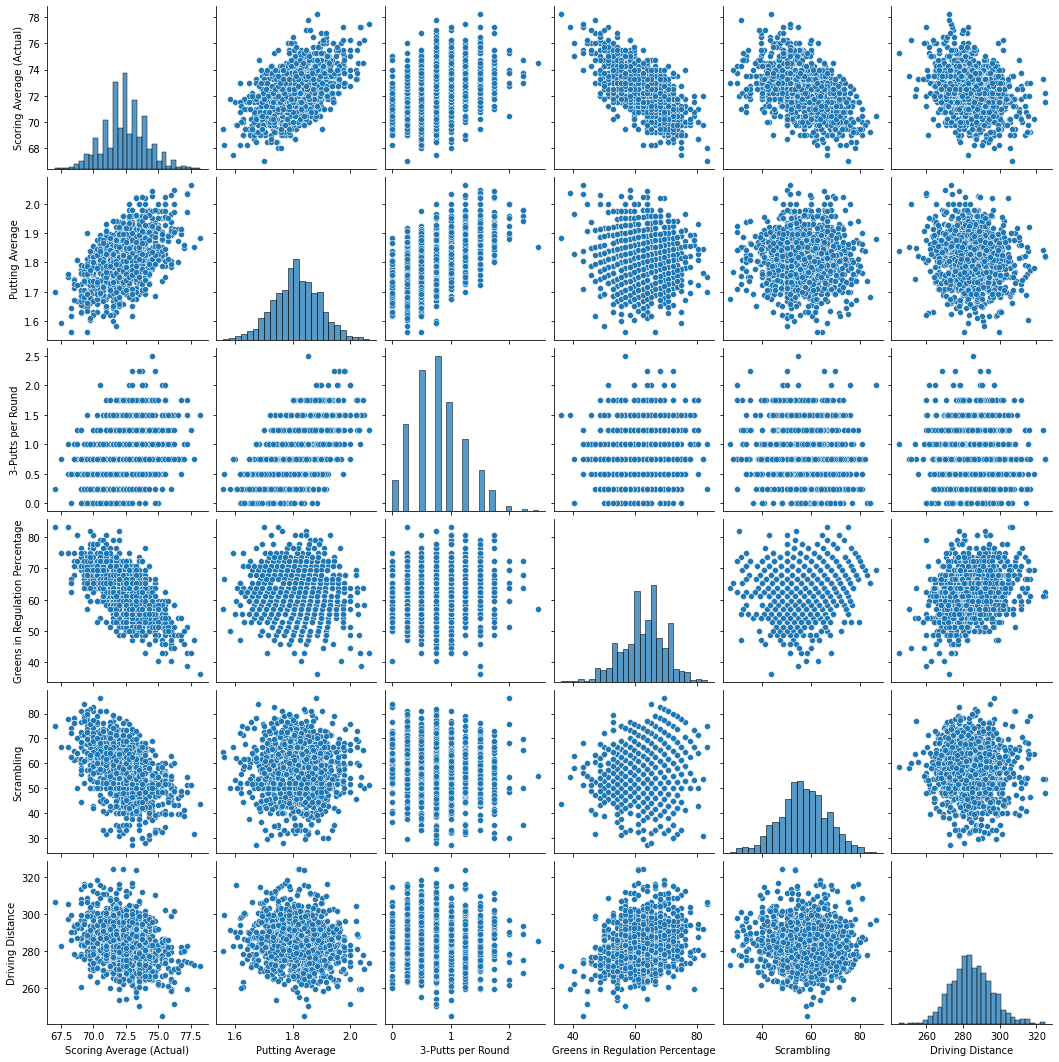

In [23]:
# model 3 pair plot
main_df_3=main_df[['Scoring Average (Actual)','Putting Average','3-Putts per Round','Greens in Regulation Percentage','Scrambling','Driving Distance']]
sns.pairplot(main_df_3)
plt.savefig('model3_pairplot.png', dpi=300)

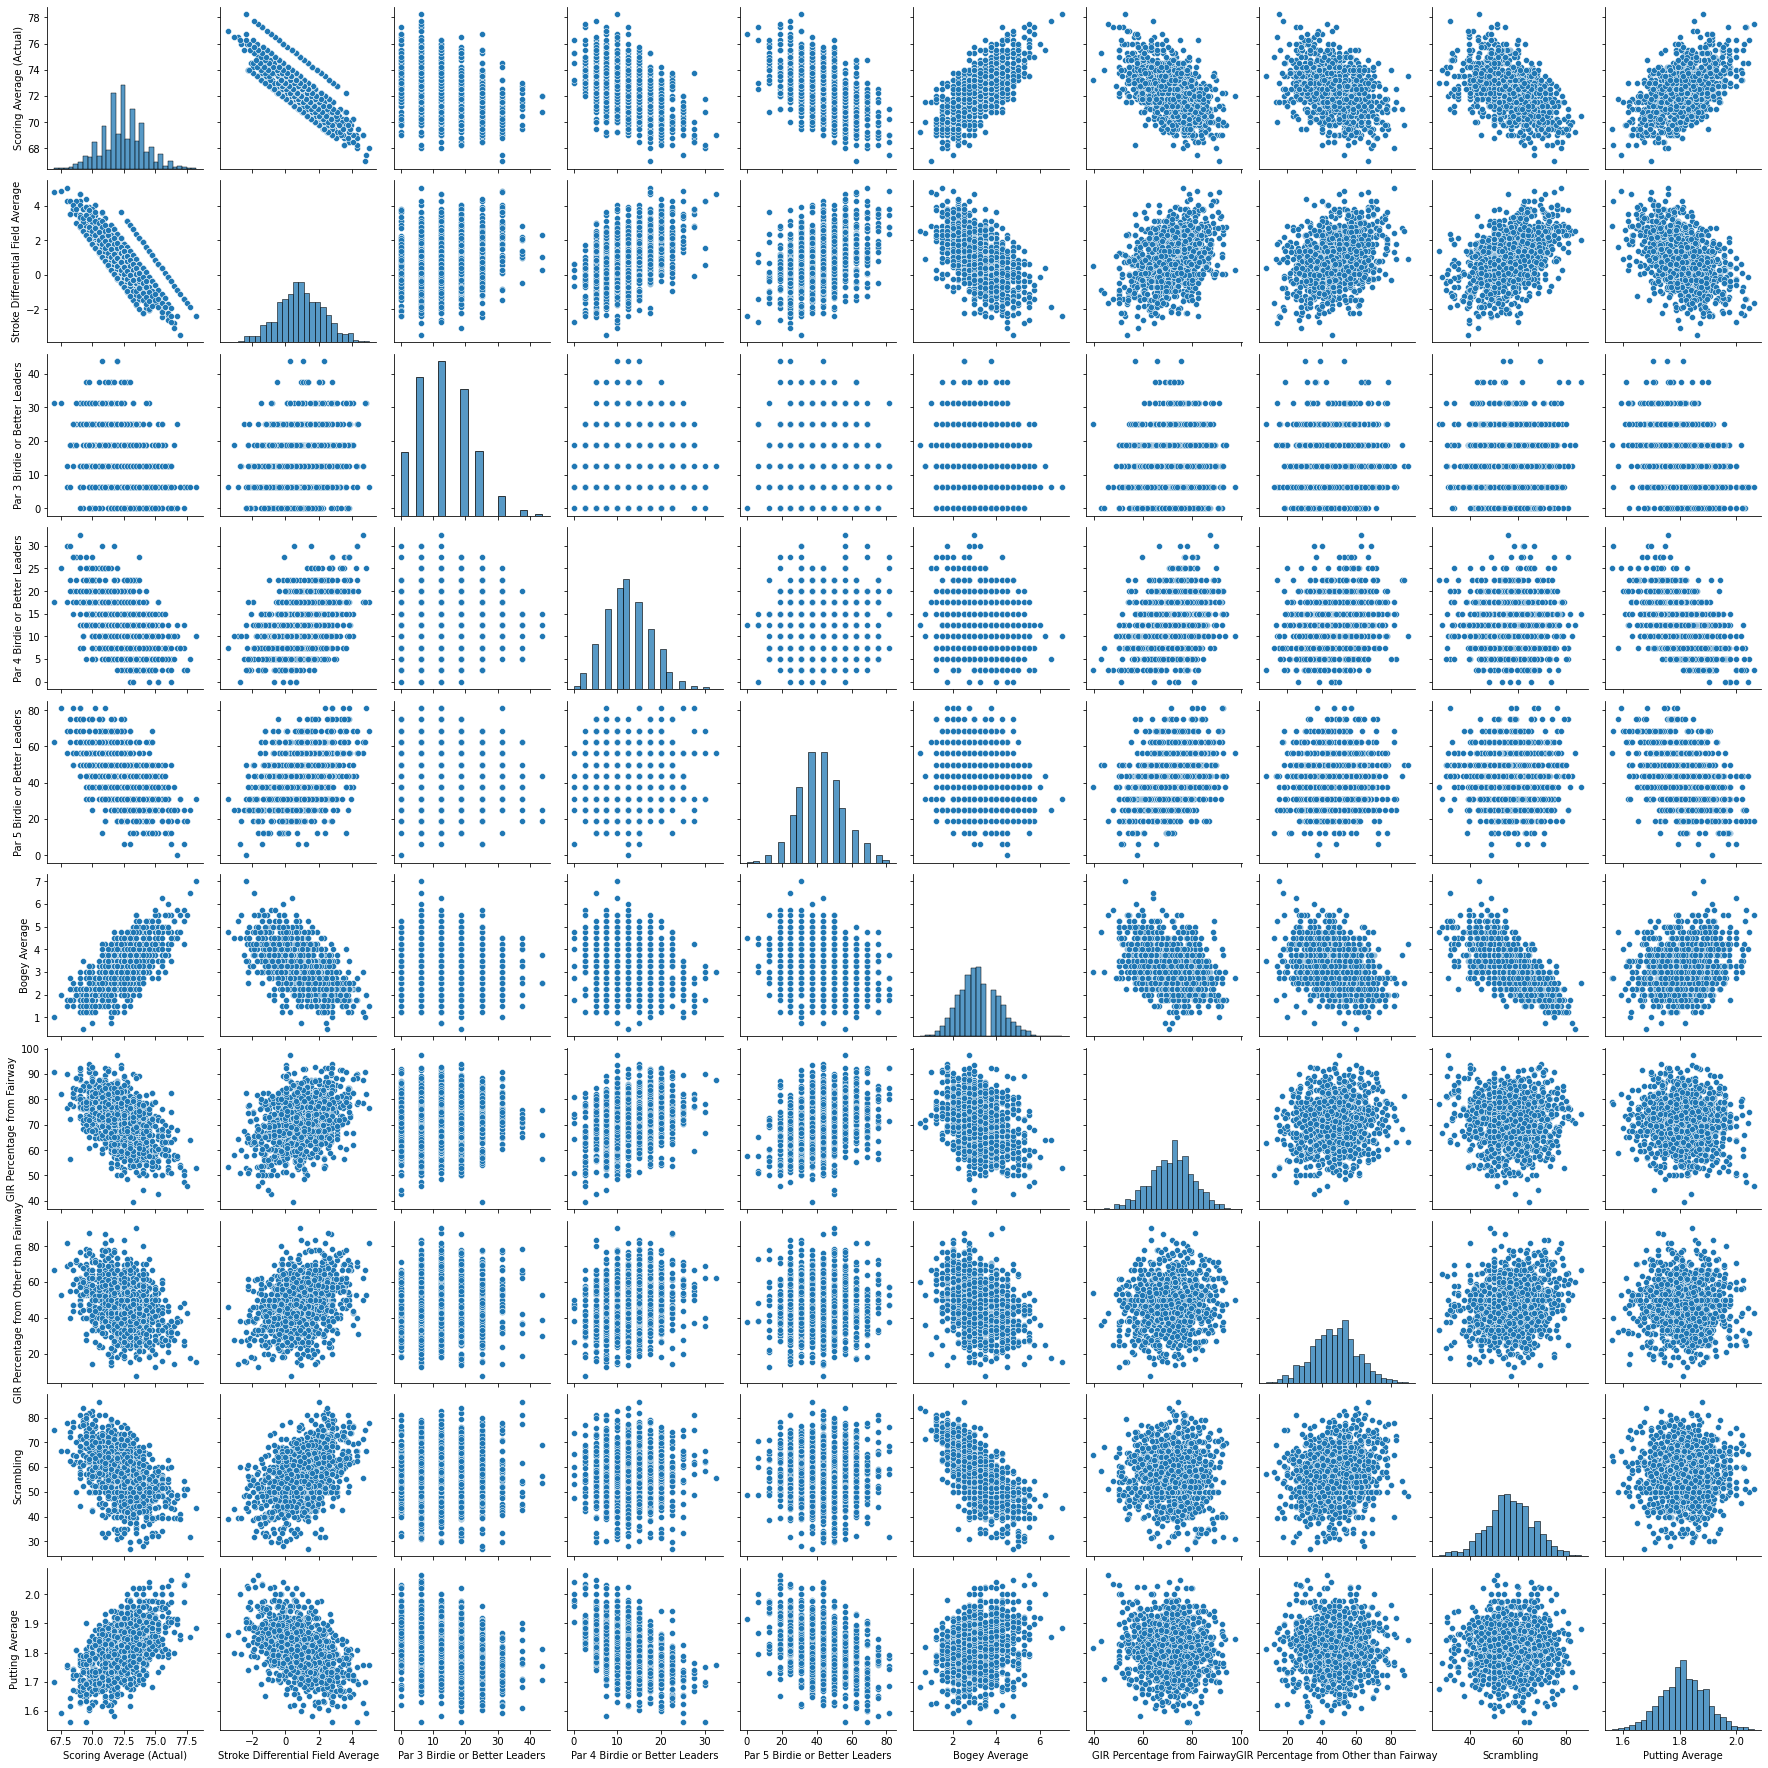

In [24]:
# model 1 pair plot
main_df_1=main_df[['Scoring Average (Actual)','Stroke Differential Field Average','Par 3 Birdie or Better Leaders','Par 4 Birdie or Better Leaders','Par 5 Birdie or Better Leaders','Bogey Average','GIR Percentage from Fairway','GIR Percentage from Other than Fairway','Scrambling','Putting Average']]
sns.pairplot(main_df_1)
plt.savefig('model1_pairplot.png', dpi=300)

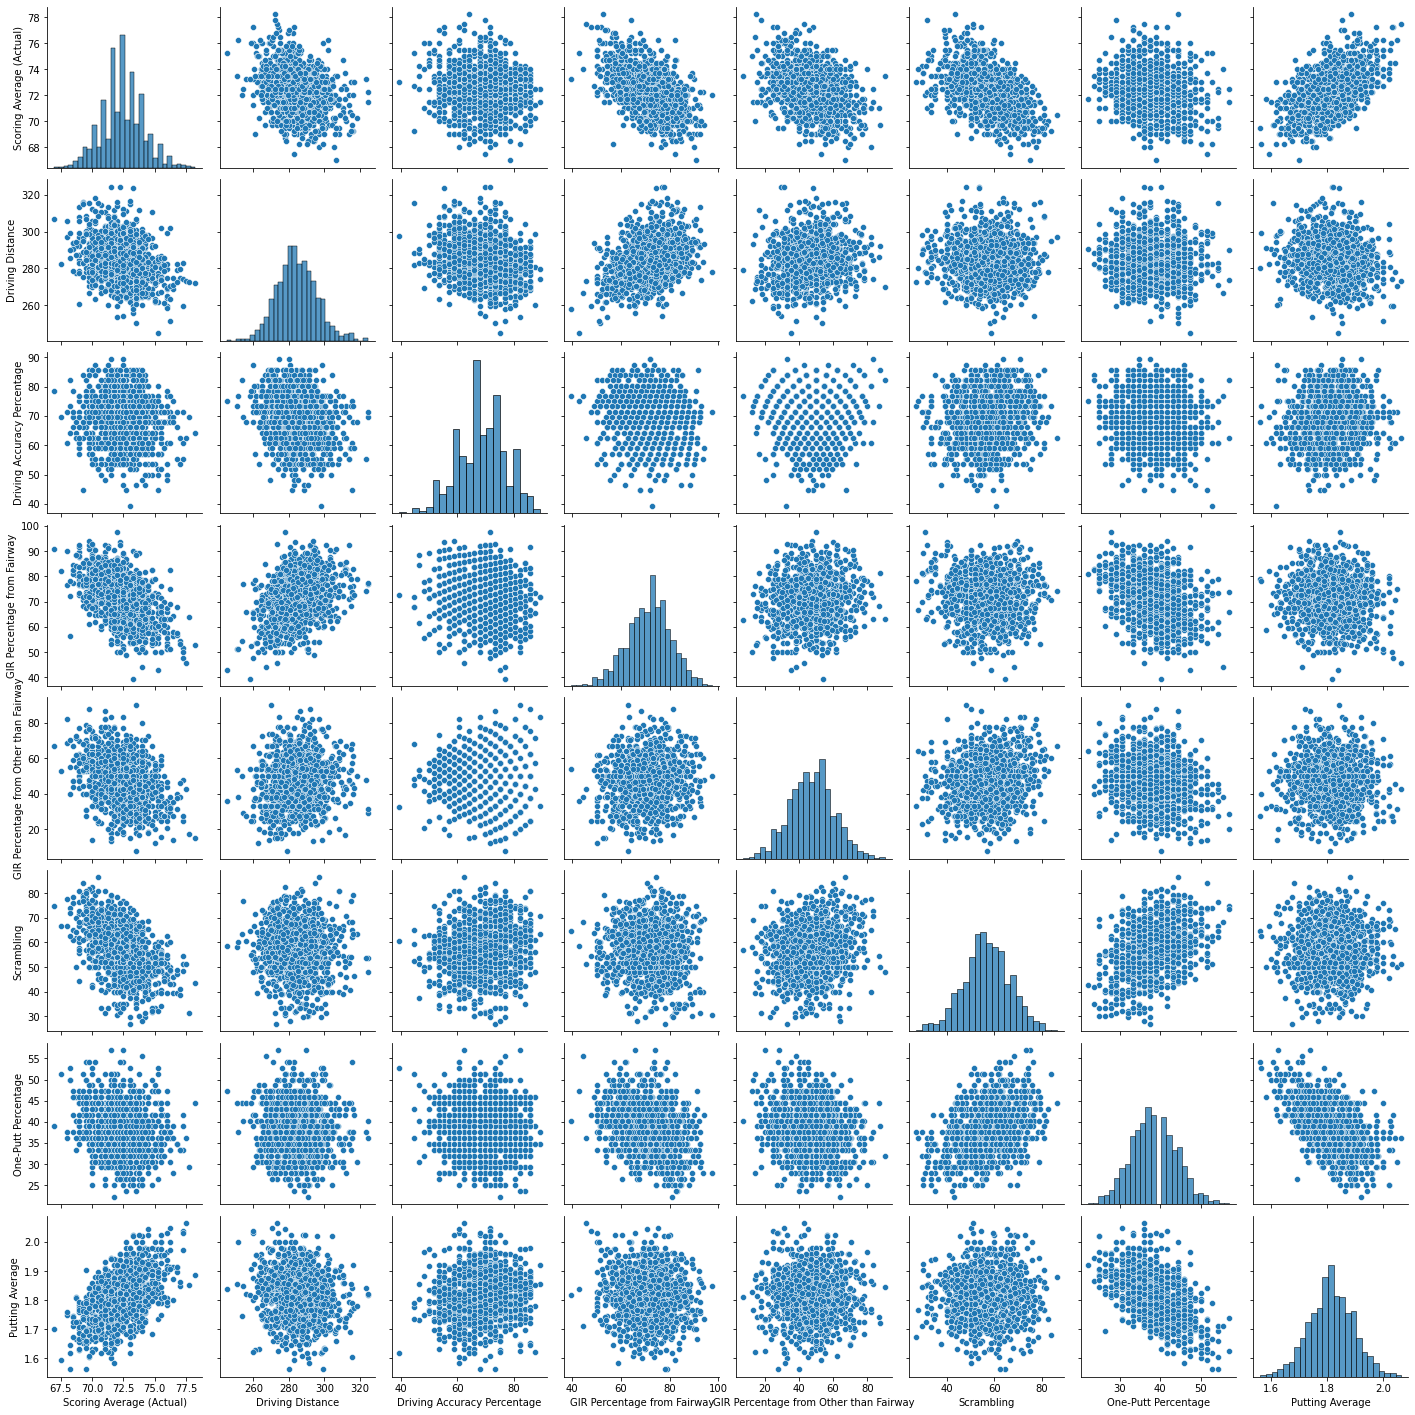

In [25]:
# model 2 pair plot
main_df_2=main_df[['Scoring Average (Actual)','Driving Distance','Driving Accuracy Percentage','GIR Percentage from Fairway','GIR Percentage from Other than Fairway','Scrambling','One-Putt Percentage','Putting Average']]
sns.pairplot(main_df_2)
plt.savefig('model2_pairplot.png', dpi=300)

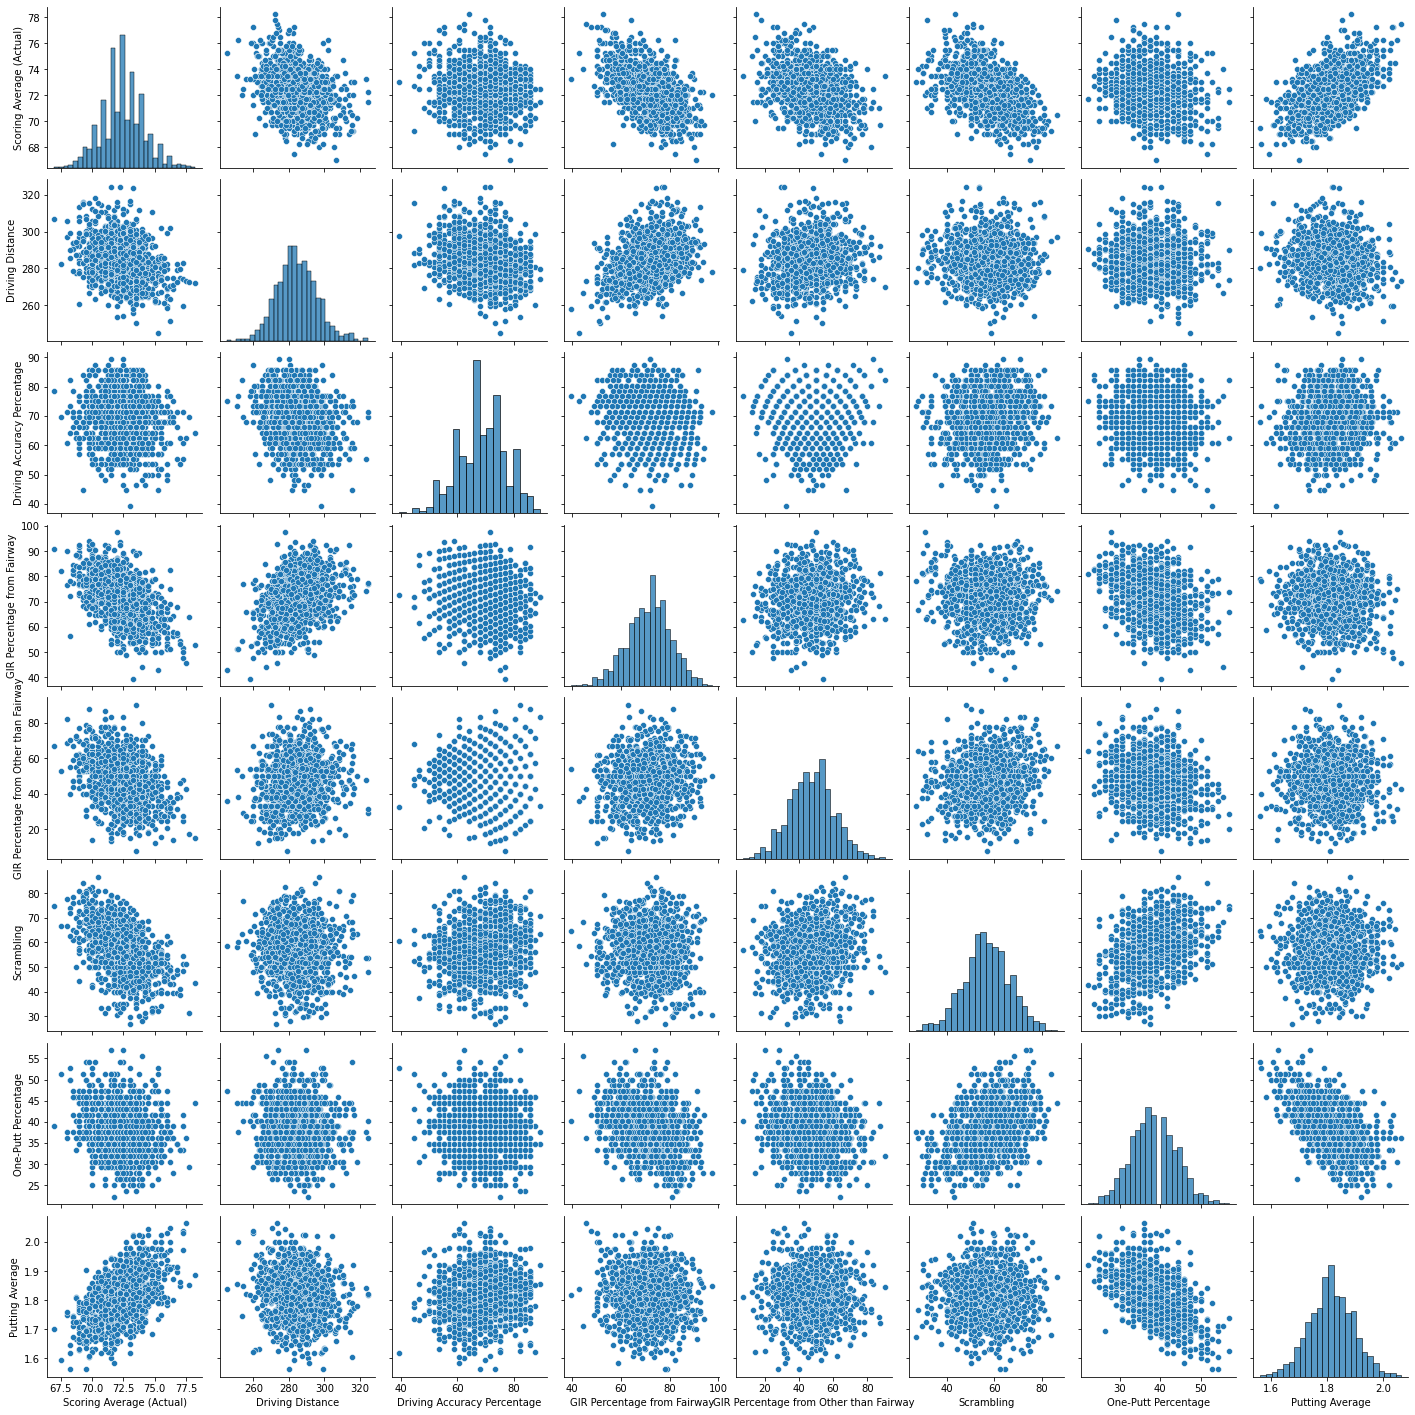

In [26]:
# model 4 pair plot
main_df_4=main_df[['Scoring Average (Actual)','Greens in Regulation Percentage','Scrambling','3-Putts per Round','Putting Average']]
sns.pairplot(main_df_2)
plt.savefig('model4_pairplot.png', dpi=300)